##<center> Iterated complex factorial.  Gamma function fractals </center>##

Recently I came across a discussion on    [*Gamma Function and Fractal Factorials*](https://plus.google.com/collection/8zrhX), having as starting point this [blogpost](http://www.mathistopheles.co.uk/2015/05/14/fractal-factorials/). 

In this IPython Notebook we give the Python code to  reproduce the [Mathistopheles' results](http://www.mathistopheles.co.uk/2015/05/14/fractal-factorials/), and experiment further with this kind of fractals.

The general properties of Gamma function can be found
[here](http://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Gamma_function.html).

We start with a numerical experiment illustrating dynamical behaviour of the iterates $f^n(z)$, where $f(z)=\Gamma(z+1)$

In [50]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # we need this function to set the height of colorbar
%matplotlib inline

Let us  compute a segment of orbit of a point $z_0=z$, i.e. a few terms of the associated sequence $z_n=\Gamma(z_{n-1}+1)$:

In [21]:
z=1+2*1j
for k in range(25):
    z=gamma(z+1)
    print  z   

(0.112294242346+0.323612885502j)
(0.874251610757-0.106907952791j)
(0.948777931191-0.0344226143472j)
(0.978939780955-0.0131190526063j)
(0.991207960208-0.00532017265948j)
(0.996303046707-0.00221084553826j)
(0.99844060215-0.000927985087496j)
(0.999341357858-0.000391146097996j)
(0.999721652072-0.00016515827861j)
(0.999882339531-6.97884699653e-05j)
(0.999950258692-2.94987085552e-05j)
(0.999978970815-1.24703833083e-05j)
(0.999991109308-5.27206671296e-06j)
(0.999996241176-2.2289086121e-06j)
(0.999998410832-9.4234074471e-07j)
(0.999999328125-3.98405671696e-07j)
(0.999999715942-1.68439456526e-07j)
(0.999999879905-7.12135242212e-08j)
(0.999999949226-3.01079554434e-08j)
(0.999999978533-1.27291706642e-08j)
(0.999999990924-5.38169373053e-09j)
(0.999999996163-2.27529576533e-09j)
(0.999999998378-9.61959400108e-10j)
(0.999999999314-4.06701364081e-10j)
(0.99999999971-1.71946965567e-10j)


We notice how the sequence  $z_n$ approaches 1.

In [11]:
z=3-0.2*1j
for k in range(10):
    z=gamma(z+1)
    print  z   

(5.77861687872-1.48371352226j)
(-369.648653382-156.601091536j)
(-0-0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)


In [17]:
z=2.9899809160305342-0.18574297188755021*1j
for k in range(10):
    z=gamma(z+1)
    print  z   

(5.73689190891-1.36064649141j)
(-306.495252172-227.687734931j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)


Choosing randomly points in the complex plane, their iterates either approach 1 or after a number of iterations
the function `gamma` returns a `nan` (not a number), except for fixed points of the function  $f(z)=\Gamma(z+1)$, i.e. points $z$, sucha that $f(z)=z$.

$z=1$ and $z=2$ are fixed points:

In [24]:
z=2
for k in range(5):
    z=gamma(z+1)
    print z

2.0
2.0
2.0
2.0
2.0


In order illustrate the fate of orbits starting at the points of a rectangular grid in the complex plane  we adapt to this case the Escape Time Algorithm used to generate
[Julia sets](http://nbviewer.ipython.org/github/empet/Math/blob/master/Julia-set.ipynb).

To each point $z_0$   one associates
an integer $n$,   which is either the first iterate  that is at a distance less than $0.005$ from $1$
or the modulus $|z_n|$  is `nan`. If in a prescribed number of iterations, `Miter`, no one of the two conditions
is met than the `Miter` is associated to that point:

In [53]:
def iterGamma(z,Miter):
   
    for n in range(Miter):
        if  np.abs(z-1)<0.005  or np.isnan(np.abs(z)):
            return n    
        z=gamma(z+1) 
        
    return Miter    


The next Python function generates the visual representation  of  the patterns  associated to the function $f(z)=\Gamma(z+1)$, through the above  algorithm:

In [86]:
def plotGammaiterated(re, im,  cmap, filename=False, N=100, Miter=50):
    
    # re is a tuple giving the interval on the real axis for the rectangular region
    # im is a tuple giving the interval on the imaginary axis
    # cmap is the name of the colormap used to plot the fractal set
    # filename is string such as 'imagefile.png'
    # N is the number of points in an unit interval
    
    Nx=int((re[1]-re[0])*N)# horizontal resolution
    Ny=int((im[1]-im[0])*N)# vertical resolution
    x=np.linspace(re[0], re[1], Nx)
    y=np.linspace(im[0], im[1], Ny)
    w=np.zeros((Ny,Nx), dtype=int)

    for n in xrange(Ny):
        for m in xrange(Nx):
            z =x[m]+1j*y[n]
            w[n][m] = iterGamma(z, Miter)
    
    fig=plt.figure() 
    ax = fig.add_subplot(111) 

    im=plt.imshow(w, cmap=cmap, extent=(re[0], re[1], im[0], im[1]), interpolation='nearest', origin='lower') 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.075)
    plt.colorbar(im, cax=cax)
   
    if (filename):
        plt.savefig(filename)  

In [87]:
plt.rcParams['figure.figsize']=11,  12

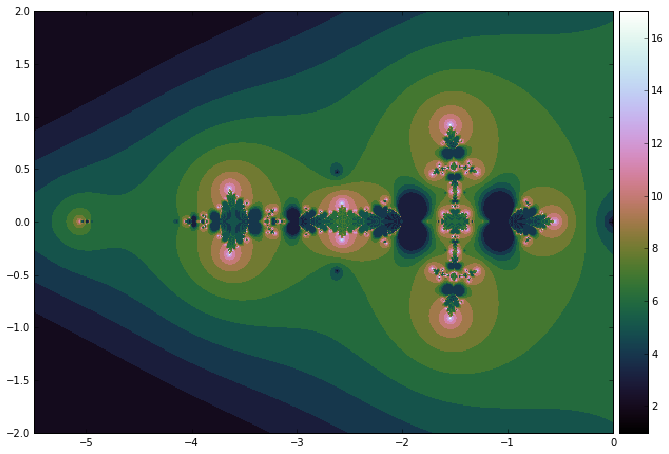

In [88]:
plotGammaiterated((-5.5, 0),(-2,2), 'cubehelix' )

Enlarging the above rectangle we get:

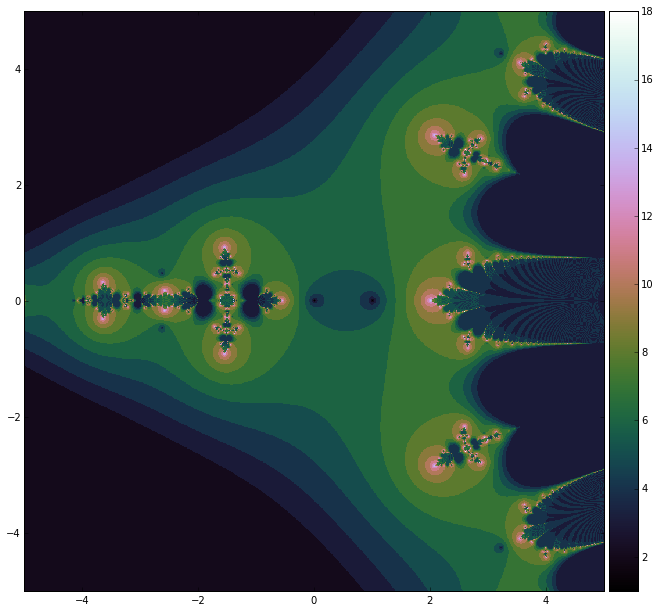

In [57]:
plotGammaiterated((-5, 5),(-5,5), 'cubehelix' )

We change the colormap:

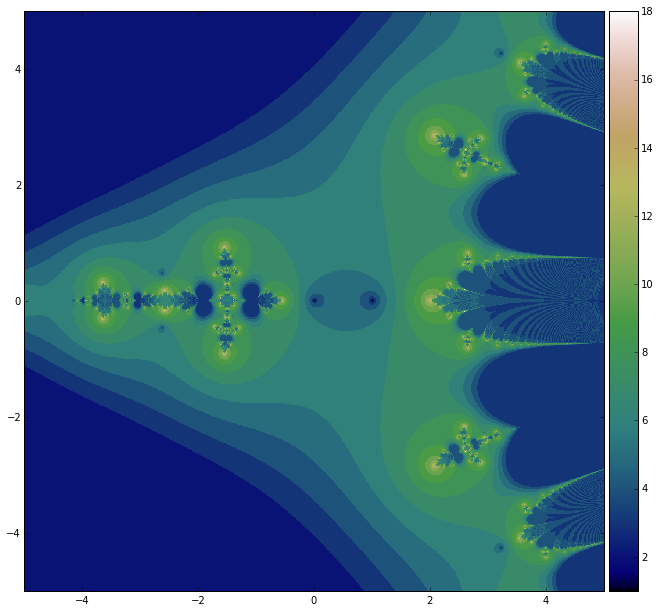

In [58]:
plotGammaiterated((-5, 5),(-5,5), 'gist_earth' )

Now let us zoom a subregion in the above plot:

In [59]:
plt.rcParams['figure.figsize']=9,9

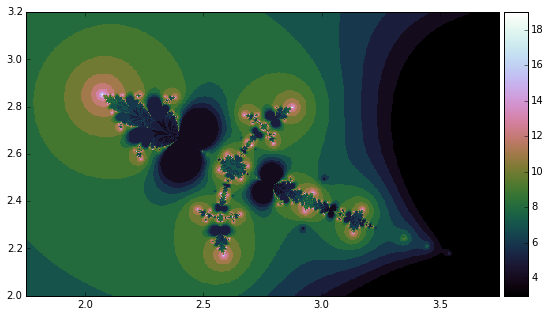

In [60]:
plotGammaiterated((1.75, 3.75),(2,3.2), 'cubehelix', N=300 )

In order to test the conjecture that the iterates of some points approach the number 1, while other escape to  infinity or none of these conditions is met,
we define a new function that returns a tuple of four elements, $(r,g,b,a)$, representing respectively the colors `yellow`, `black` and `white`.

- `yellow` encodes the  points whose orbit approaches 1
- `black` encodes the points whose iterates escape to infinity
- `white` encodes the third type of points (fixed points and possible points in other $f$-invariant sets).

In [67]:
def iterGamma3cols(z, Miter):
    
    for n in range(Miter):
        if  np.abs(z-1)<0.005:
            return   (1.0, 0.8,  0.0, 1.0)# yellow
            
        if  np.isnan(np.abs(z)):
            return (0,0,0,1) #black
        z=gamma(z+1) 
    
    return (1,1,1,1) #white

In [68]:
def plotGammaiter3cols(re, im,   N=100, Miter=50, filename=False):
    
   
    Nx=int((re[1]-re[0])*N)
    Ny=int((im[1]-im[0])*N)
    x=np.linspace(re[0], re[1], Nx)
    y=np.linspace(im[0], im[1], Ny)
    w=np.zeros((Ny, Nx, 4), dtype=float)

    for n in xrange(Ny):
        for m in xrange(Nx):
            z =x[m]+1j*y[n]
            w[n][m] = iterGamma3cols(z, Miter)
            #print str(n) 
    
    fig=plt.figure() 
    ax = fig.add_subplot(111) 

    im=plt.imshow(w,  extent=(re[0], re[1], im[0], im[1]), interpolation='nearest', origin='lower') 

    if(filename):
        plt.savefig(filename)   

In [69]:
plt.rcParams['figure.figsize']=10,10

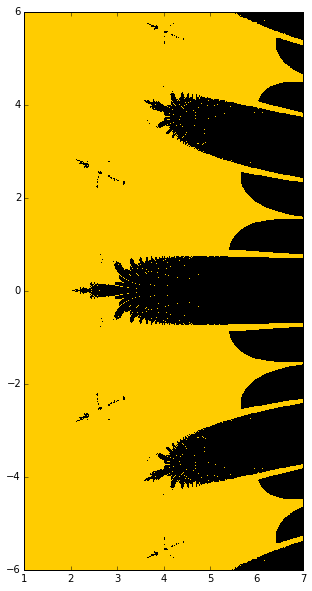

In [70]:
plotGammaiter3cols(re=(1,7), im=(-6,6))

Let us zoom the central protuberance:

In [71]:
plt.rcParams['figure.figsize']=10, 6

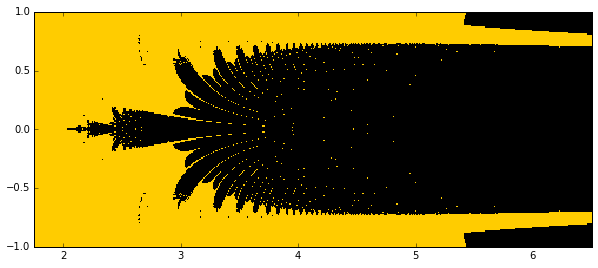

In [72]:
plotGammaiter3cols(re=(1.75,6.5), im=(-1,1))

The colored representation of this protuberance is the following:

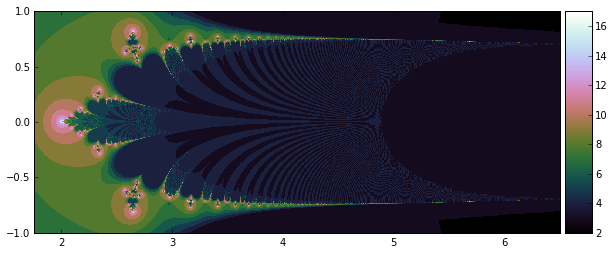

In [73]:
plotGammaiterated((1.75,6.5), (-1,1), 'cubehelix', N=300, Miter=100)

A new zoom:

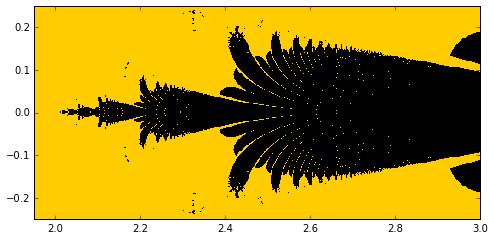

In [79]:
plotGammaiter3cols(re=(1.95,3), im=(-0.25,0.25), N=500)

and its colored version illustrates the self similarity:

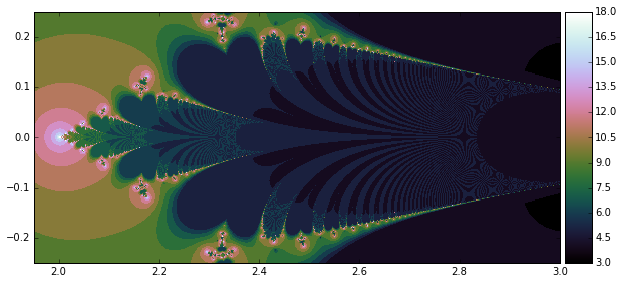

In [75]:
plotGammaiterated((1.95,3), (-0.25,0.25), 'cubehelix', N=500, Miter=100)

In [76]:
plt.rcParams['figure.figsize']=8, 8

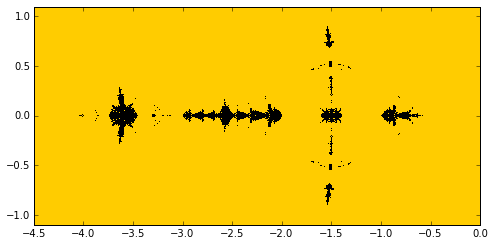

In [77]:
plotGammaiter3cols(re=(-4.5,0), im=(-1.1,1.1), N=200)

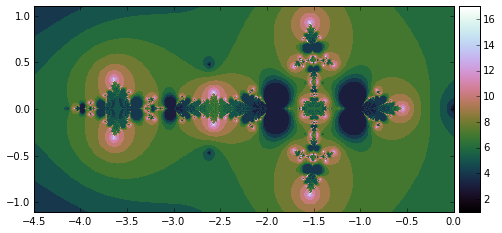

In [78]:
plotGammaiterated((-4.5,0), (-1.1,1.1), 'cubehelix', N=200, Miter=100)

Emilia Petrisor

For new updates visit:
[https://github.com/empet/Math/blob/master/README.md](https://github.com/empet/Math/blob/master/README.md)

In [80]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()